# Podatki
Zbrani so bili naslednji podatki:
1. 250k_rndm_zinc_drugs_clean_3.csv ([chemical_vae](https://github.com/aspuru-guzik-group/chemical_vae/blob/master/models/zinc/250k_rndm_zinc_drugs_clean_3.csv), podatki so vzeti iz članka Gómez-Bombarelli in sod.) - 250k zapisov v zapisu SMILES, 3 regresijski atributi (logP - srednja vrednost: 2.46, standardni odklon: 1.43, qed - srednja vrednost: 0.73, standardni odklon: 0.14, SAS: srednja vrednost: 3.05, standardni odklon: 0.83)
2. BBBP.csv ([moleculenet.ai](http://moleculenet.ai/datasets-1)) - 2039 zapisov, 1 binarni klasifikacijski atribut:  ali molekula prehaja med krvno-možgansko pregrado.
3. clintox.csv ([moleculenet.ai](http://moleculenet.ai/datasets-1)) - 1478 zapisov, 2 binarna klasifikacijska atributa: ali je molekula odobrena iz strani FDA in ali je molekula toksična
4. HIV.csv  ([moleculenet.ai](http://moleculenet.ai/datasets-1)) - 41127 zapisov, 1 binarni klasifikacijski atribut: ali molekula inhibira virus HIV
5. sider.csv ([moleculenet.ai](http://moleculenet.ai/datasets-1)) - 1427 zapisov, 27 binarnih klasifikacijskih atributov: ali molekula povzroča stranske učinke rezličnim telesnim organom (npr. oči, prebava, sluh,...)
6. BACE.csv ([moleculenet.ai](http://moleculenet.ai/datasets-1)) - 1513 zapisov, 1 binarni klasifikacijski atribut: vezanje na človekov inhibitor BACE-1 
7. Lipophilicity.csv ([moleculenet.ai](http://moleculenet.ai/datasets-1)) - 4200 zapisov, 1 regresijski atribut (lastnost molekule koliko prehaja med membranami: srednja vrednost: 2.19, standardni odklon: 1.2)
8. SAMPL.csv ([moleculenet.ai](http://moleculenet.ai/datasets-1)) - 642 zapisov, 1 regresijski atribut (hidracijska energija molekule v vodi: srednja vrednost: -3.8, standardni odklon: 3.84)
9. ESOL.csv ([moleculenet.ai](http://moleculenet.ai/datasets-1)) - 1128 zapisov, 1 regresijski atribut (topnost v vodi: srednja vrednost: -2.99, standardni odklon: 1.63)

In [1]:
base = '../data/'
files = ['250k_rndm_zinc_drugs_clean_3.csv', 'BBBP.csv', 'clintox.csv', 'HIV.csv', 'sider.csv', 'bace.csv', 'Lipophilicity.csv', 'SAMPL.csv', 'ESOL.csv']
params = [{'col_smiles':0, 'col_target':-1, 'start_row':1, 'delimiter':',', 'quotechar':'\"'},
          {'col_smiles':3, 'col_target':-1, 'start_row':1, 'delimiter':',', 'quotechar':'\"'},
          {'col_smiles':0, 'col_target':-1, 'start_row':1, 'delimiter':',', 'quotechar':'\"'},
          {'col_smiles':0, 'col_target':-1, 'start_row':1, 'delimiter':',', 'quotechar':'\"'},
          {'col_smiles':0, 'col_target':-1, 'start_row':1, 'delimiter':',', 'quotechar':'\"'},
          {'col_smiles':0, 'col_target':-1, 'start_row':1, 'delimiter':',', 'quotechar':'\"'},
          {'col_smiles':2, 'col_target':-1, 'start_row':1, 'delimiter':',', 'quotechar':'\"'},
          {'col_smiles':1, 'col_target':-1, 'start_row':1, 'delimiter':',', 'quotechar':'\"'},
          {'col_smiles':9, 'col_target':-1, 'start_row':1, 'delimiter':',', 'quotechar':'\"'},]

# Notacija SMILES
V podatkih so kemijske strukture zapisane v notaciji SMILES. SMILES (angl. Simplified Molecular Input Line Entry Specification) je specifikacija, ki  uporablja nize ASCII znakov za opis struktur molekul. Za zapis atomov so uporabljeni njihovi pripadajoči atomski simboli, ki morajo biti v oglatih oklepajih. Izjema so organski elementi (B, C, N, O, P, S, F, Cl, Br in I), kjer se oklepaje preskoči in vodik, ki se ga ponavadi ne piše in se implicitno ugotovi njegovo prisotnost (CH<sub>4</sub> se zapiše kot C). 
Podobno velja za vezi. Enojne vezi, ki so najbolj pogoste, se ne označuje (CH<sub>3</sub>-OH se zapiše kot CO). Za dvojne se uporablja "=" in za trojne "#" (CO<sub>2</sub> se zapiše kot O=C=O). Za zapisovanje obročev se uporabljajo številke, torej mesta kjer se stika obroč, označimo s številko na dveh nesosednjih atomih (cikloheskan za zapiše kot C1CCCCC1). V kolikor je obročev več, se uporabi naslednja zaporedna številka. V kolikor se v kemijski strukturi pojavi razvejanost, so stranske verige zapisane v oklepajih (but-2-en se zapiše kot C(=CC)C). Aromatski atomi se zapišejo z malimi črkami, torej C, O, S in N so prikazani z c, o, s in n. Po dogovoru se predvidi, da so vezi med aromatskimi atomi aromatske, se jih pa lahko izpiše eksplicitno z ":".
V zapisu se lahko dodajo tudi dodatne stereokemične informacije. Za kiralnost se uporabljata znaka @ ali @@, za konfiguracije ob dvojni vezi pa se uporabljata "\\" in "/", ki kažeta smer enojne vezi, ki sledi dvojni.

### Prikaz zapisov SMILES za nekaj molekul in njihov grafični prikaz


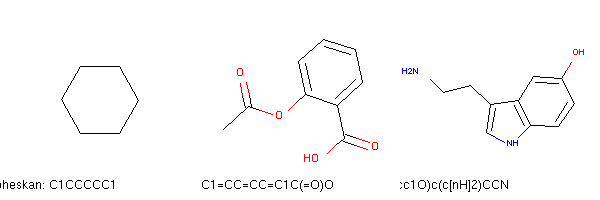

In [27]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import DrawingOptions

smiles = [('Cikloheskan', 'C1CCCCC1'),
          ('Aspirin', 'CC(=O)OC1=CC=CC=C1C(=O)O'), 
          ('Serotonin', 'c1cc2c(cc1O)c(c[nH]2)CCN',)]

ms = [Chem.MolFromSmiles(smile) for _,smile in smiles]
[AllChem.Compute2DCoords(m) for m in ms]

img = Draw.MolsToGridImage(ms, 3, legends=[': '.join(pair) for pair in smiles])
img

### Statistika zapisov SMILES v podatkih 

In [17]:
import numpy as np
from pprint import pprint
import sys
sys.path.insert(0, '../code')
import cheauder_utils

for i, filename in enumerate(files):
    smiles, _, _ = cheauder_utils.read_data(base+filename, **params[i])
    lengths = list(map(len, smiles.tolist()))
    chars = ', '.join(np.sort(list(set(''.join(smiles)))))
    print('{} - length: min: {}, max: {}, mean: {} \nused symbols: {}\n'.format(filename, np.min(lengths), np.max(lengths),
                                                                             np.mean(lengths), chars))

250k_rndm_zinc_drugs_clean_3.csv - length: min: 9, max: 109, mean: 44.31046080455393 
used symbols: #, (, ), +, -, /, 1, 2, 3, 4, 5, 6, 7, 8, =, @, B, C, F, H, I, N, O, P, S, [, \, ], c, l, n, o, r, s

BBBP.csv - length: min: 3, max: 400, mean: 51.47414634146342 
used symbols: #, %, (, ), +, -, ., /, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, =, @, B, C, F, H, I, N, O, P, S, [, \, ], a, c, l, n, o, r, s

clintox.csv - length: min: 2, max: 339, mean: 59.34231805929919 
used symbols: #, (, ), +, -, ., /, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, =, @, A, B, C, F, H, I, M, N, O, P, S, T, Z, [, \, ], a, c, e, g, i, l, n, o, r, s, t, u

HIV.csv - length: min: 4, max: 580, mean: 45.34245143093345 
used symbols: #, %, (, ), +, -, ., 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, =, A, B, C, F, G, H, I, K, L, M, N, O, P, R, S, T, U, V, W, Z, [, ], a, b, c, d, e, g, h, i, l, n, o, p, r, s, t, u

sider.csv - length: min: 1, max: 1195, mean: 64.77428571428571 
used symbols: #, (, ), +, -, ., /, 1, 2, 3, 4, 5, 6, 7, 8, =, @, A, B, C, F, G